In [1]:
import time, re
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException

In [2]:
def initialize_driver(executable_path):

    s = Service(executable_path=executable_path)
    driver = webdriver.Chrome(service=s)
    driver.maximize_window()
    return driver

In [3]:
def scrape_reviews(driver, url):

    driver.get(url)
    time.sleep(5)

    reviews_button = driver.find_element(By.CSS_SELECTOR,'#reviews-medley-footer > div.a-row.a-spacing-medium > a')
    reviews_button.get_attribute('href')
    reviews_button.click()
    time.sleep(0.75)

    totals =  driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/div/div[1]/div/div[1]/div[4]/div").text
    total_ratings_match = re.search(r'([\d,]+) total ratings', totals)
    if total_ratings_match:

        total_ratings = int(total_ratings_match.group(1).replace(",", ""))  # Remove comma

        # Extract total reviews
        total_reviews_match = re.search(r'([\d,]+) with reviews', totals)
        if total_reviews_match:
            total_reviews = int(total_reviews_match.group(1).replace(",", ""))  # Remove comma

    n = round(total_reviews/10)
    print(n)
    star_rating = []
    review = []
    name = []
    review_title = []
    votes = []
    verified = []
    # ReviewID = []


    for j in range(n):
        review_elements = driver.find_elements(By.CSS_SELECTOR,'i[data-hook="review-star-rating"] span.a-icon-alt')
        page_total_reviews = len(review_elements)

        for i in range(1, page_total_reviews + 1):
            try:
                rating = driver.find_elements(By.CSS_SELECTOR,'i[data-hook="review-star-rating"] span.a-icon-alt')
                rating = rating[i-1].get_attribute('innerHTML')
                star = float(rating.split()[0])

                rev = driver.find_element(By.XPATH, f"/html/body/div[1]/div[2]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[{i+1}]/div/div/div[4]/span/span").text
                rev_name = driver.find_element(By.XPATH, f"/html/body/div[1]/div[2]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[{i+1}]/div/div/div[1]/a/div[2]/span").text
                title = driver.find_element(By.XPATH, f"/html/body/div[1]/div[2]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[{i+1}]/div/div/div[2]/a/span[2]").text
                
                try: helpful_votes =  driver.find_element(By.XPATH, f"/html/body/div[1]/div[2]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[{i+1}]/div/div/div[5]/div/span[1]/div[1]/span").text
                except: helpful_votes = '0 helpful votes'

                try: verified_purchase = driver.find_element(By.XPATH, f"/html/body/div[1]/div[2]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[{i+1}]/div/div/div[3]/a[2]/span").text
                except: verified_purchase = 'Not a Verified Purchase'

            except Exception as e: print(e)

            star_rating.append(star)
            review.append(rev)
            name.append(rev_name)
            review_title.append(title)
            if helpful_votes == 'Helpful': votes.append('0 helpful votes')
            else: votes.append(helpful_votes)
            verified.append(verified_purchase)
        
        try:
            next_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, '#cm_cr-pagination_bar > ul > li.a-last > a'))
            )
            next_button.click()
            time.sleep(1.5)
        except:
            break
        print(f'{j} is done')
    return star_rating, review, name, review_title, votes, verified

In [4]:
def main():
    urls = ['https://www.amazon.com/dp/B0BYLJ3HH7?ref_=cm_sw_r_cp_ud_dp_K9518ZWP7QPY9CGBKXD3&th=1', 'https://www.amazon.com/dp/B09WZF9633?ref_=cm_sw_r_cp_ud_dp_4T7X35DYN1G52PX889BN_1&th=1',
            'https://www.amazon.com/dp/B08XYP6BJV?ref_=cm_sw_r_cp_ud_dp_FX17EPC24AF0YC1B2JX4_1', 'https://www.amazon.com/dp/B08M91FTJW?_encoding=UTF8&psc=1&ref_=cm_sw_r_cp_ud_dp_D4PC0KH8VM0MZ9RWQM8C',
            'https://www.amazon.com/dp/B07F3SNQT5?ref_=cm_sw_r_cp_ud_dp_YAM85QGN8A18TXN92KWV&th=1', 'https://www.amazon.com/dp/B0CLBV27N2?ref_=cm_sw_r_cp_ud_dp_G9F99MT1TGF7PC7D5HM6',
            'https://www.amazon.com/dp/B089TYDR5H?ref_=cm_sw_r_cp_ud_dp_KXGVA4KFVAT77G1J6PJ6', 'https://www.amazon.com/dp/B0007MZV3C?ref_=cm_sw_r_cp_ud_dp_BC28X8S1GE803Z5J2EMW',
            'https://www.amazon.com/dp/B0BVXDPZP3?ref_=cm_sw_r_cp_ud_dp_CM2YG40E4Y01Q2PRJ9N0', 'https://www.amazon.com/dp/B0074WGG82?ref_=cm_sw_r_cp_ud_dp_N977QKQM7GSCWK6MK4JP',
            'https://www.amazon.com/dp/B0CF3BDBL2?_encoding=UTF8&psc=1&ref_=cm_sw_r_cp_ud_dp_PV9BWYBQ750GN0H6V2YD', 'https://www.amazon.com/dp/B01MY05VGS?ref_=cm_sw_r_cp_ud_dp_FEJ1WCTP3XSGEH3FN3QQ',
            'https://www.amazon.com/dp/B0C5NT72GS?ref_=cm_sw_r_cp_ud_dp_ZSHAFJ2Z1K3KPFNT7NXH', 'https://www.amazon.com/dp/B07TCQN5NZ?ref_=cm_sw_r_cp_ud_dp_D77QM8FAK1MGRT0V5GFC',
            'https://www.amazon.com/dp/B0B9YSJC5S?ref_=cm_sw_r_cp_ud_dp_NYQDHQ80S7GSFRDBSJK4', 'https://www.amazon.com/dp/B0BPD4JMWT?ref_=cm_sw_r_cp_ud_dp_EHQGA0G67JAF1T05AKBR',
            'https://www.amazon.com/dp/B01N1037CV?ref_=cm_sw_r_cp_ud_dp_7FZB3R32WMX4K75G33ZE', 'https://www.amazon.com/dp/B0C6BQVDX3?ref_=cm_sw_r_cp_ud_dp_398G1X22ZGM8V9MB24XK', 
            'https://www.amazon.com/dp/B08YS7QZLL?_encoding=UTF8&psc=1&ref_=cm_sw_r_cp_ud_dp_ZH9B4M6GG711HES4BND6','https://www.amazon.com/dp/B0B57QV5TT?ref_=cm_sw_r_cp_ud_dp_5FH4Z31TY8GAA00ER85Y', 
            'https://www.amazon.com/dp/B0BSP2QC9F?ref_=cm_sw_r_cp_ud_dp_MWXX9YJN7E8S0VXHQTNA_1','https://www.amazon.com/dp/B0BHKQ45VR?ref_=cm_sw_r_cp_ud_dp_9GPNMYNJHEP1J76QXEWF',
            'https://www.amazon.com/dp/B097BQZFCW?ref_=cm_sw_r_cp_ud_dp_ZPPVC1X8E6ZCFYZC0GV2', 'https://www.amazon.com/dp/B08LJVMZD8?ref_=cm_sw_r_cp_ud_dp_TV7802KH8XE44QTCCB8M',]

    driver = initialize_driver('C:/Users/uttar/OneDrive/Desktop/Data Mining/chromedriver.exe')

    all_review_dfs = []

    for url in urls:
        star_rating, review, name, review_title, votes, verified = scrape_reviews(driver, url)
        review_df = pd.DataFrame({
            'review_header': review_title,
            'reviewer_name': name,
            'review_content': review,
            'review_star_rating': star_rating,
            'review_helpful_votes': votes,
            'verified_purchase': verified
        })

        all_review_dfs.append(review_df)

    driver.quit()

    return all_review_dfs

In [5]:
# Call the main function to get data for all URLs
all_review_dfs = main()

10
0 is done
1 is done
2 is done
3 is done
Message: no such element: Unable to locate element: {"method":"xpath","selector":"/html/body/div[1]/div[2]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[6]/div/div/div[4]/span/span"}
  (Session info: chrome=122.0.6261.113); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF7F2DDAD22+56930]
	(No symbol) [0x00007FF7F2D4F622]
	(No symbol) [0x00007FF7F2C042E5]
	(No symbol) [0x00007FF7F2C498ED]
	(No symbol) [0x00007FF7F2C49A2C]
	(No symbol) [0x00007FF7F2C8A967]
	(No symbol) [0x00007FF7F2C6BCDF]
	(No symbol) [0x00007FF7F2C881E2]
	(No symbol) [0x00007FF7F2C6BA43]
	(No symbol) [0x00007FF7F2C3D438]
	(No symbol) [0x00007FF7F2C3E4D1]
	GetHandleVerifier [0x00007FF7F3156AAD+3709933]
	GetHandleVerifier [0x00007FF7F31AFFED+4075821]
	GetHandleVerifier [0x00007FF7F31A817F+4043455]
	GetHandleVerifier [0x00007FF7F2E79756+706710]
	

In [6]:
all_review_dfs

[                             review_header                 reviewer_name  \
 0   Wonderful product and would recommend!                           S&K   
 1        It is renewed but looked like new                         Andre   
 2                                 Worth it                         Alice   
 3                      Brick Stolen Device                     Dana Rajc   
 4                                  Minimum               Dennis Deckmann   
 ..                                     ...                           ...   
 95                This is a waste of money                   Andrea Ogle   
 96                            As expected!                    Colin Reed   
 97                                      🤦🏻                       Valerie   
 98                            Doesn’t work                    Brigitte V   
 99                        Excelente compra  Luis Daniel Lezama Galaschow   
 
                                        review_content  review_star_rating

In [7]:
dfs = []

for i, df in enumerate(all_review_dfs):
    df.insert(0, 'productID', i+1)
    df.insert(1, 'prodSiteID', f"Amazon{i+1}")
    df.insert(2, 'ReviewID', range(1, len(df) + 1))
    dfs.append(df)
    #df.to_excel(f'../data/amazon_url_{i+1}_review_data.xlsx', index=False)
concatenated_df = pd.concat(dfs, ignore_index=True)

concatenated_df.to_excel("../data/Amazon_Review_data_all.xlsx", index=False)
print("Concatenation complete. New Excel file created.")

Concatenation complete. New Excel file created.


In [8]:
import re

# Read the Excel file
df = pd.read_excel('../data/Amazon_Review_data_all.xlsx')

# Function to extract the number of helpful votes
def extract_helpful_votes(text):
    first_word = text.split()[0]
    if first_word.isdigit():
        return int(first_word)
    elif first_word.lower() == 'one':
        return 1
    else:
        return 0

# Apply the function to the 'Helpful_votes' column
df['review_helpful_votes'] = df['review_helpful_votes'].apply(extract_helpful_votes)

df['verified_purchase'] = df['verified_purchase'].apply(lambda x: True if x == 'Verified Purchase' else False)

# Save the modified DataFrame back to Excel
df.to_excel('../data/Amazon_Review_data_all.xlsx', index=False)

print("Edits complete. Excel file overwritten.")

Edits complete. Excel file overwritten.


### Texblob

In [12]:
import pandas as pd
import numpy as np

import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords
nltk.download("stopwords")

import textblob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uttar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [8]:
reviews = pd.read_excel('../data/Amazon_Review_data_all.xlsx')
products = pd.read_excel('../data/Amazon_Product_data_all.xlsx')

In [9]:
test_blob = textblob.TextBlob(products.loc[0]['product_details'])

In [10]:
products['description_subjectivity'] = None

In [14]:
stop = set(stopwords.words("english"))
for i,row in products.iterrows():
    blob = textblob.TextBlob(str(row['product_details']) + "\n" + str(row['product_specs']))

    subj = blob.subjectivity

    row['description_subjectivity'] = float(subj)
    products.loc[i] = row


#prods['product_price'] = prods['product_price'].str.replace('\$|,','',regex=True)

products.head()

,productID,prodSiteID,site,URL,product_title,product_details,product_specs,total_star_rating,total_reviews,product_price,description_subjectivity
0,1,amazon1,amazon,https://a.co/d/6pjCaNX,"Apple iPhone 14, 256GB, Blue - Unlocked (Renew...",Vibrant 6.1-inch Super Retina XDR display with...,Brand - Apple\nModel Name - iPhone 14\nWireles...,4.2,101.0,664.71,0.497845
1,2,amazon2,amazon,https://a.co/d/ie6e7bD,Renewed Samsung Galaxy S22 Ultra 512GB - 8K Ca...,"6.8"", 1440 x 3088pixels, Infinity-O FHD+ Dynam...",Brand - SAMSUNG\nModel Name - Galaxy S22 Ultra...,4.2,356.0,619.50,0.362857
2,3,amazon3,amazon,https://a.co/d/0dZiHJC,HP DeskJet 2755e Wireless Color inkjet-printer...,PERFECT FOR HOME – Best for printing basic col...,Brand - HP\nConnectivity Technology - Wireless...,4.1,8044.0,49.89,0.594556
3,4,amazon4,amazon,https://a.co/d/17mJ1Ve,JBL Flip 5: Portable Wireless Bluetooth Speake...,Up to 20W of Audio Power | Bluetooth 4.2 Techn...,Brand - JBL\nModel Name - JBL Flip 5\nSpeaker ...,4.8,365.0,89.95,0.651587
4,5,amazon5,amazon,https://a.co/d/caDKBgC,"Microsoft 365 Family | 12-Month Subscription, ...",With 12 months of Microsoft 365 for up to six ...,Platform: Subscription (PC/Mac)\nEdition: Micr...,4.4,305.0,99.99,0.504762


In [15]:
products.info()
products['description_subjectivity'] = products['description_subjectivity'].astype(float)
products.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   productID                 24 non-null     int64  
 1   prodSiteID                24 non-null     object 
 2   site                      24 non-null     object 
 3   URL                       24 non-null     object 
 4   product_title             24 non-null     object 
 5   product_details           23 non-null     object 
 6   product_specs             23 non-null     object 
 7   total_star_rating         23 non-null     float64
 8   total_reviews             23 non-null     float64
 9   product_price             23 non-null     float64
 10  description_subjectivity  24 non-null     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 2.2+ KB


,count,mean,std,min,25%,50%,75%,max
productID,24.0,12.500000,7.071068,1.00,6.750000,12.500000,18.250000,24.000000
total_star_rating,23.0,4.421739,0.332971,3.40,4.200000,4.400000,4.600000,4.900000
total_reviews,23.0,931.652174,2053.382677,9.00,111.500000,312.000000,400.500000,8044.000000
product_price,23.0,222.756522,356.158195,3.35,39.920000,89.950000,314.495000,1596.000000
description_subjectivity,24.0,0.502866,0.143273,0.00,0.450288,0.501646,0.599885,0.740476


In [17]:
reviews[['review_subjectivity','review_polarity']] = None,None
for i,row in reviews.iterrows():
    blob = textblob.TextBlob(str(row['review_content']))
    row[['review_subjectivity','review_polarity']] = float(blob.subjectivity),float(blob.polarity)
    reviews.loc[i] = row

In [18]:
reviews['review_length'] = reviews['review_content'].str.len()

reviews

,productID,prodSiteID,ReviewID,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,review_subjectivity,review_polarity,review_length
0,1,Amazon1,1,Wonderful product and would recommend!,S&K,I had an older android and was having a hard t...,5,11,True,0.501115,0.230356,2860.0
1,1,Amazon1,2,It is renewed but looked like new,Andre,"It was packaged very well, Amazon packaging, n...",5,0,True,0.604943,0.273504,282.0
2,1,Amazon1,3,Worth it,Alice,"The phone came in perfect conditions, without ...",5,2,True,0.513636,0.484091,138.0
3,1,Amazon1,4,Brick Stolen Device,Dana Rajc,If I could send negative stars I would. The ph...,1,24,True,0.520982,0.124726,1571.0
4,1,Amazon1,5,Minimum,Dennis Deckmann,Minimum quality. Seems to pick up noise. Not v...,4,0,True,0.461538,-0.269231,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2072,24,Amazon24,96,Great for a small space,Sunshine8787,This is good for the price- it’s great for sma...,4,3,True,0.505769,0.285641,460.0
2073,24,Amazon24,97,Good quality and comfortable.,madeline spampinato,Arrives in two separate boxes on two separate ...,4,5,True,0.446528,0.077083,218.0
2074,24,Amazon24,98,Color,Andrews,Sofa is perfect for smaller area/ bedroom conv...,5,0,True,0.680556,0.422222,164.0
2075,24,Amazon24,99,It really was the “Best Choice”,emily,I was wonderfully surprised after work by my c...,5,0,True,0.557143,0.299405,642.0


In [21]:
x = reviews.groupby('productID',as_index=False).agg({
    'review_helpful_votes':'mean',
    'review_subjectivity':'mean',
    'review_polarity':'mean',
    'review_length':'mean'
}
)

x.merge(right=products,how='left',on='productID')[
    ['product_title','URL','review_helpful_votes','review_subjectivity',
     'review_polarity','review_length','description_subjectivity','total_star_rating'
     ]
]

,product_title,URL,review_helpful_votes,review_subjectivity,review_polarity,review_length,description_subjectivity,total_star_rating
0,"Apple iPhone 14, 256GB, Blue - Unlocked (Renew...",https://a.co/d/6pjCaNX,3.390000,0.451141,0.221775,235.910000,0.497845,4.2
1,Renewed Samsung Galaxy S22 Ultra 512GB - 8K Ca...,https://a.co/d/ie6e7bD,4.330000,0.499575,0.260411,397.181818,0.362857,4.2
2,HP DeskJet 2755e Wireless Color inkjet-printer...,https://a.co/d/0dZiHJC,20.810000,0.540295,0.209435,642.210000,0.594556,4.1
3,JBL Flip 5: Portable Wireless Bluetooth Speake...,https://a.co/d/17mJ1Ve,0.550000,0.564358,0.364171,140.850000,0.651587,4.8
4,"Microsoft 365 Family | 12-Month Subscription, ...",https://a.co/d/caDKBgC,6.450000,0.495425,0.179781,432.900000,0.504762,4.4
5,"TurboTax Basic 2023 Tax Software, Federal Tax ...",https://a.co/d/9k8jeeq,2.340000,0.480497,0.172752,458.590000,0.636756,3.4
6,Hamilton Beach 24782 Retro Toaster with Wide S...,https://a.co/d/axNX0X4,0.805195,0.507125,0.170368,170.363636,0.410979,4.3
7,Razor MX350 Dirt Rocket Electric Motocross Off...,https://a.co/d/cl8WTkW,10.490000,0.518661,0.262498,563.870000,0.400794,4.6
8,LG C3 Series 65-Inch Class OLED evo 4K Process...,https://a.co/d/9gONFTO,3.060000,0.57009,0.318635,637.620000,0.481819,4.6
9,GE APPLIANCES JES1460DSBB Countertop Microwave...,https://a.co/d/gFMRAR9,3.330000,0.439942,0.165286,350.750000,0.615873,4.2


In [22]:
reviews['review_polarity'] = reviews['review_polarity'].astype(float)
reviews['review_subjectivity'] = reviews['review_subjectivity'].astype(float)
reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
productID,2077.0,12.272027,7.358534,1.0,6.000000,11.000000,19.000000,24.0
ReviewID,2077.0,49.180549,28.801905,1.0,24.000000,49.000000,74.000000,100.0
review_star_rating,2077.0,4.259027,1.177552,1.0,4.000000,5.000000,5.000000,5.0
review_helpful_votes,2077.0,3.909966,24.799603,0.0,0.000000,0.000000,2.000000,618.0
review_subjectivity,2077.0,0.514414,0.225772,0.0,0.424242,0.533333,0.644444,1.0
review_polarity,2077.0,0.241593,0.266271,-1.0,0.050000,0.212500,0.389167,1.0
review_length,2076.0,344.382466,502.877546,2.0,73.000000,182.500000,404.500000,6709.0


c:\Users\uttar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


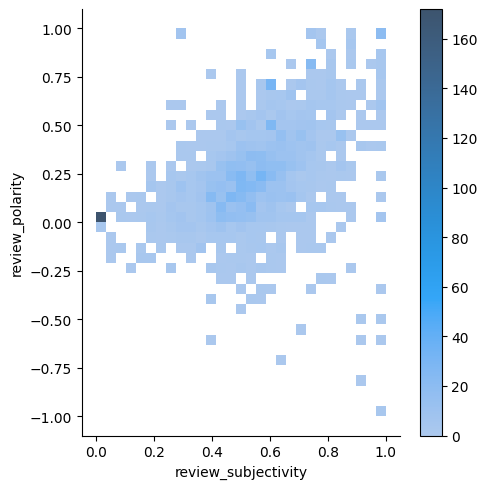

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.displot(
    data=reviews,
    x='review_subjectivity',y='review_polarity',cbar=True
)